# TNSE with SHAP

#### Import libraries

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
from numpy import loadtxt
from numpy import concatenate
from numpy import array
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

#### Load data

In [22]:
php_shap = loadtxt('../data/PHP-shap.csv', delimiter=',')
ruby_shap = loadtxt('../data/ruby-shap.csv', delimiter=',')
c_shap = loadtxt('../data/c-shap.csv', delimiter=',')
py_shap = loadtxt('../data/python-shap.csv', delimiter=',')
r_shap = loadtxt('../data/r-shap.csv', delimiter=',')
java_shap = loadtxt('../data/java-shap.csv', delimiter=',')

In [23]:
#php_shap = loadtxt('../data/php-shap-2.csv', delimiter=',')
#ruby_shap = loadtxt('../data/ruby-shap-2.csv', delimiter=',')
#c_shap = loadtxt('../data/c-shap-2.csv', delimiter=',')
#py_shap = loadtxt('../data/python-shap-2.csv', delimiter=',')
#r_shap = loadtxt('../data/r-shap-2.csv', delimiter=',')
#java_shap = loadtxt('../data/java-shap-2.csv', delimiter=',')

#### Preparing data

In [24]:
# x and y lists (features and target)
x = []
aux = []

In [25]:
x.append(php_shap)
x.append(ruby_shap)
x.append(c_shap)
x.append(py_shap)
x.append(r_shap)
x.append(java_shap)

In [26]:
aux.append(0)
aux.append(1)
aux.append(2)
aux.append(3)
aux.append(4)
aux.append(5)

y = array(aux)

In [27]:
len(x[2])

16830128

#### TNSE

In [28]:
tsne = TSNE(n_components=3, 
            init='pca', 
            verbose=1, 
            perplexity=30, 
            n_iter=1000, 
            random_state=0)

In [29]:
X_2d = tsne.fit_transform(x)

[t-SNE] Computing 5 nearest neighbors...
[t-SNE] Indexed 6 samples in 0.027s...
[t-SNE] Computed neighbors for 6 samples in 0.340s...
[t-SNE] Computed conditional probabilities for sample 6 / 6
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.518013
[t-SNE] KL divergence after 1000 iterations: 1.821710


In [30]:
X_2d

array([[ -543.29297 ,  1933.04    ,    88.438805],
       [ 3360.117   ,   -71.99993 ,   -41.65671 ],
       [ -300.3114  ,  -285.2799  ,  -679.8088  ],
       [ -558.80005 ,  -627.395   ,   798.24634 ],
       [-1161.7693  ,  -547.3591  ,   171.18216 ],
       [ -811.70667 ,  -403.71042 ,  -331.30524 ]], dtype=float32)

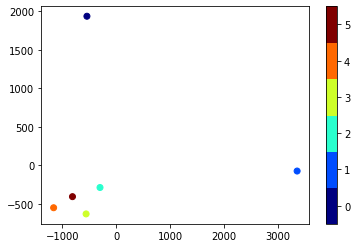

In [31]:
# plot the result
vis_x = X_2d[:, 0]
vis_y = X_2d[:, 1]
scatter = plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("jet", 6))
#plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("rainbow", 4))
plt.colorbar(ticks=range(6))
plt.clim(-0.5, 5.5)
classes = ['PHP', 'Ruby', 'C', 'Python', 'R', 'Java']
plt.savefig('../reports/languages-tnse.png')
plt.show()

#### That's all folks!!!